In [1]:
from utils import load_data, data_clustering, plot_data, cleaning_data, linear_transf
import random 
import pandas as pd
import numpy as np


In [2]:
dfx, dfy = load_data()
random.seed(10)
cluster_datasets, cluster_labels = data_clustering(dfx, dfy)
print(type(cluster_datasets), type(cluster_labels))

Cluster 1 has 170 trajectories for x and 170 trajectories for y.
Cluster 2 has 199 trajectories for x and 199 trajectories for y.
Cluster 3 has 178 trajectories for x and 178 trajectories for y.
Cluster 4 has 143 trajectories for x and 143 trajectories for y.
<class 'list'> <class 'numpy.ndarray'>


Cluster:  0


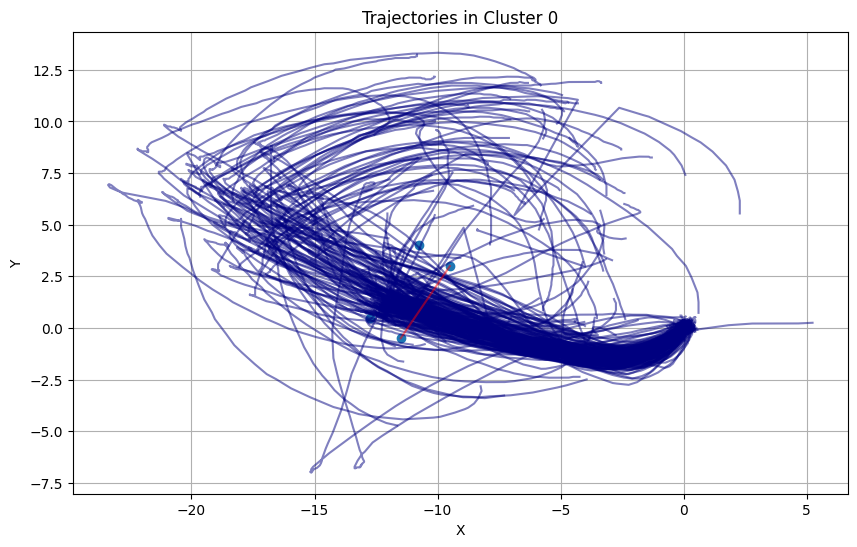

Dataset shape before cleaning:
(170, 2500)
Dataset shape after cleaning:
(166, 2500)


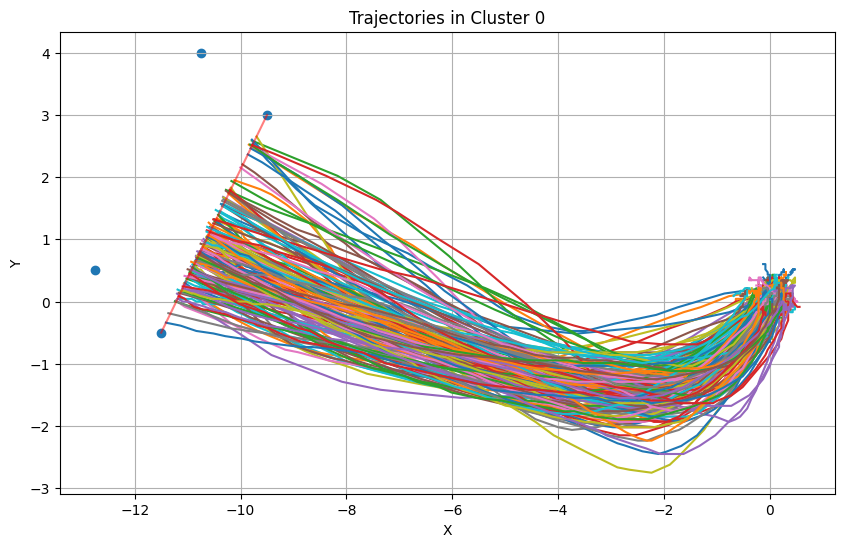

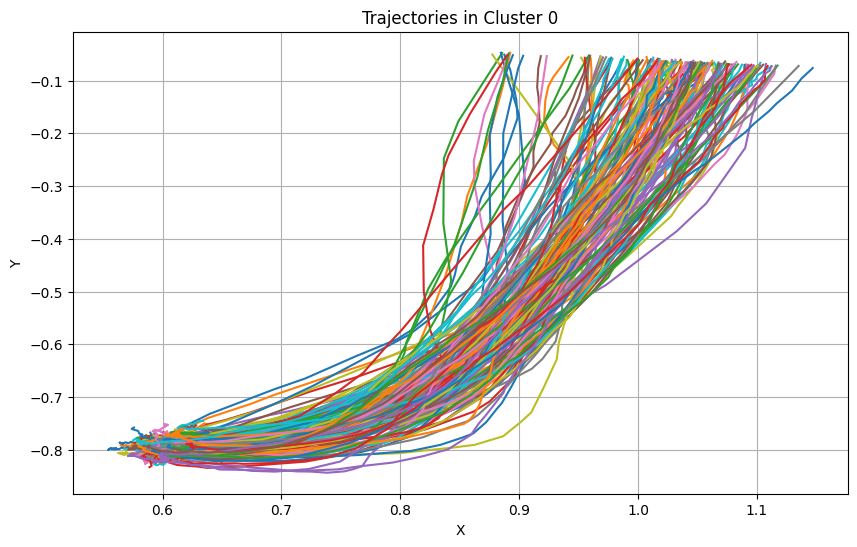

Cluster:  1


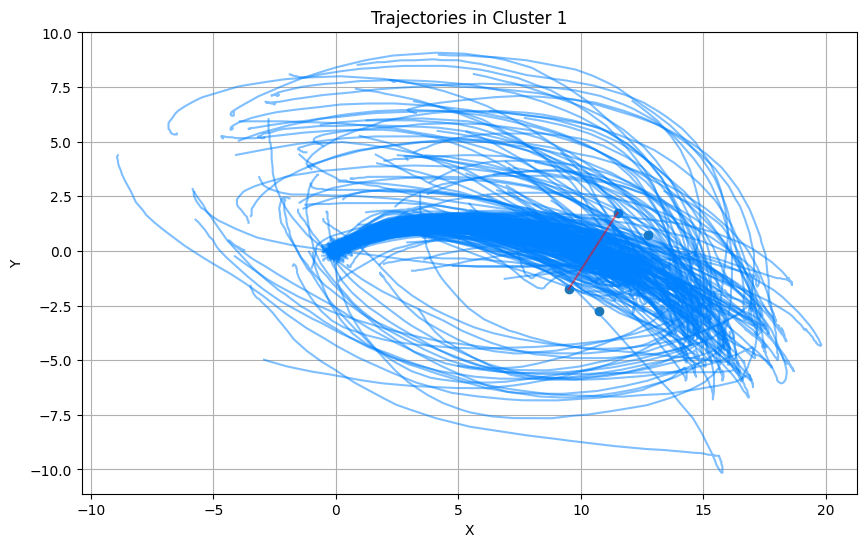

Dataset shape before cleaning:
(199, 2500)
Dataset shape after cleaning:
(198, 2500)


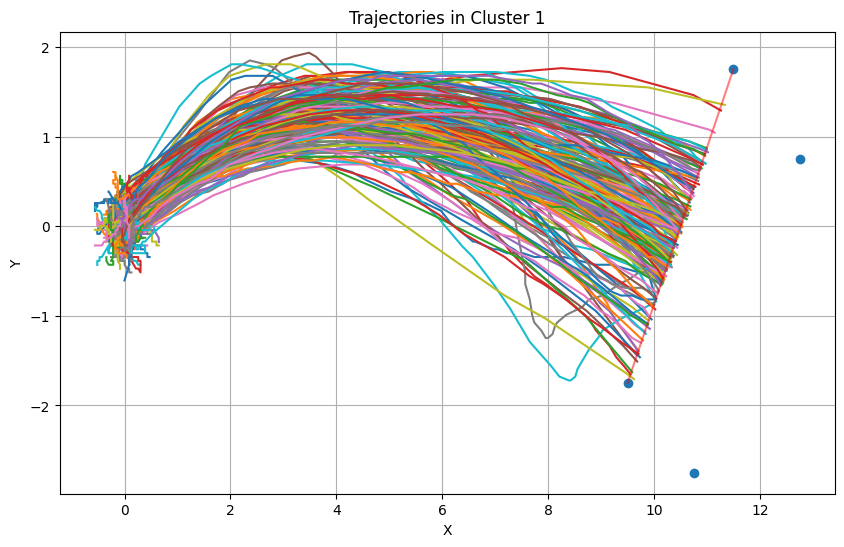

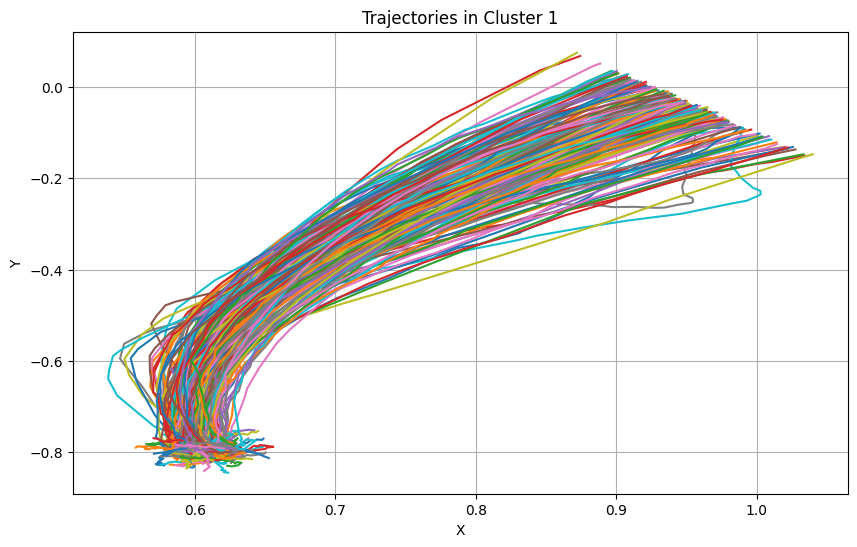

Cluster:  2


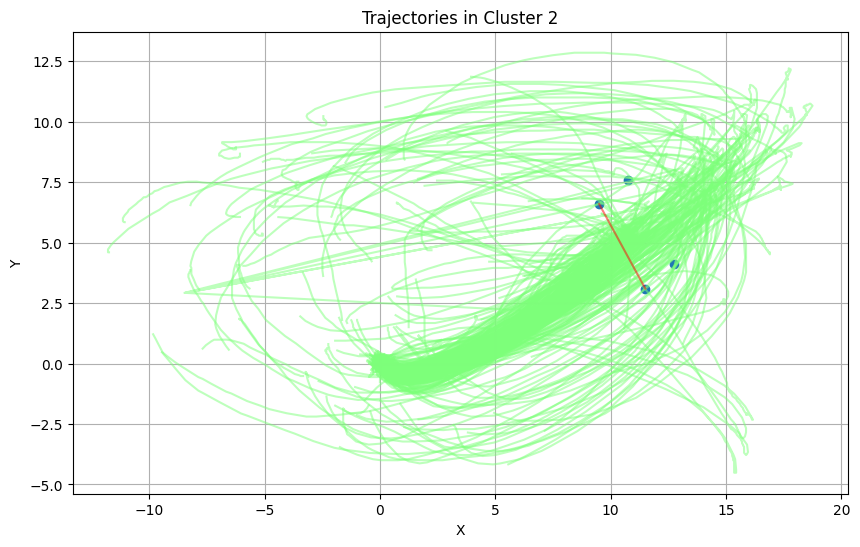

Dataset shape before cleaning:
(178, 2500)
Dataset shape after cleaning:
(168, 2500)


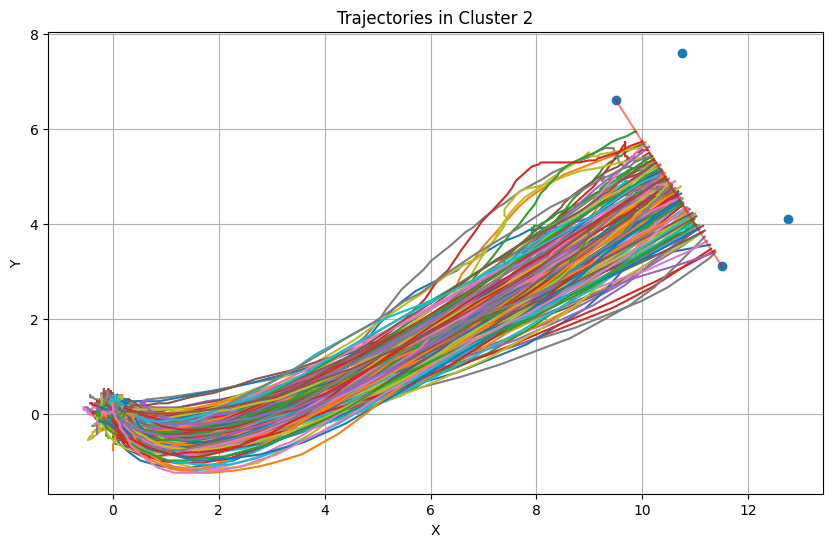

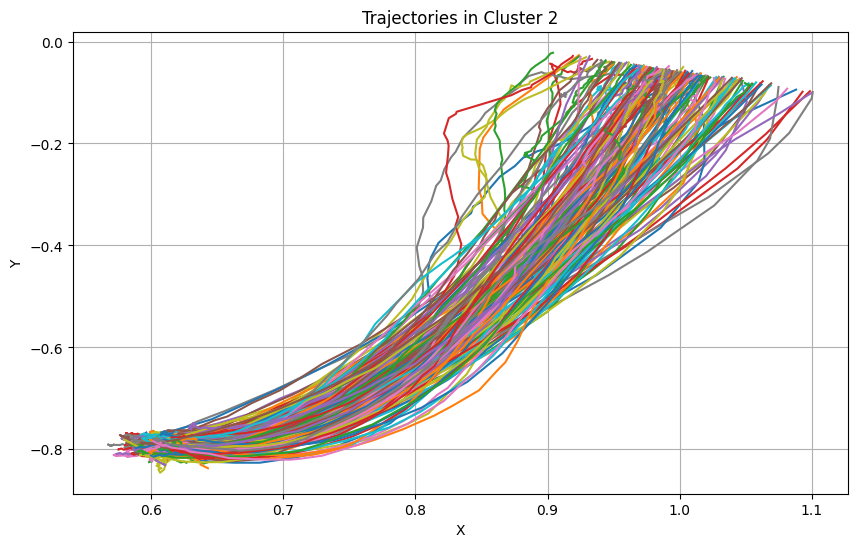

Cluster:  3


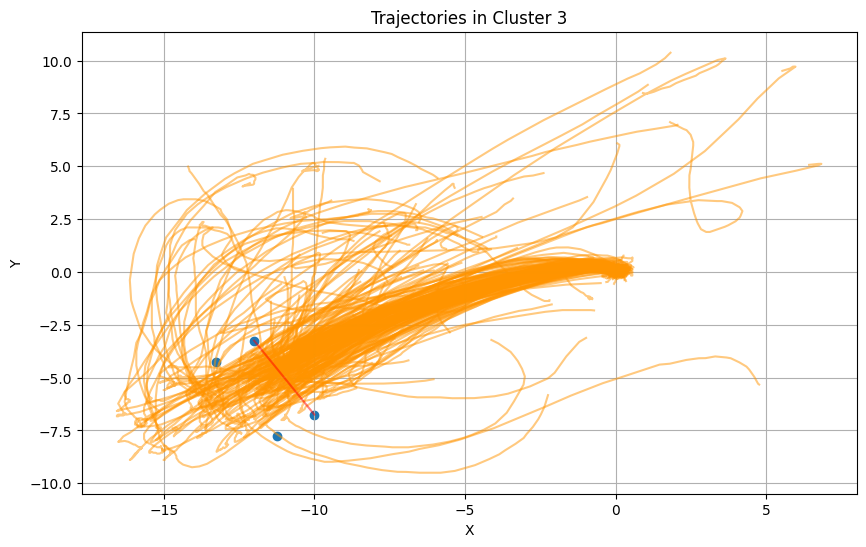

Dataset shape before cleaning:
(143, 2500)
Dataset shape after cleaning:
(110, 2500)


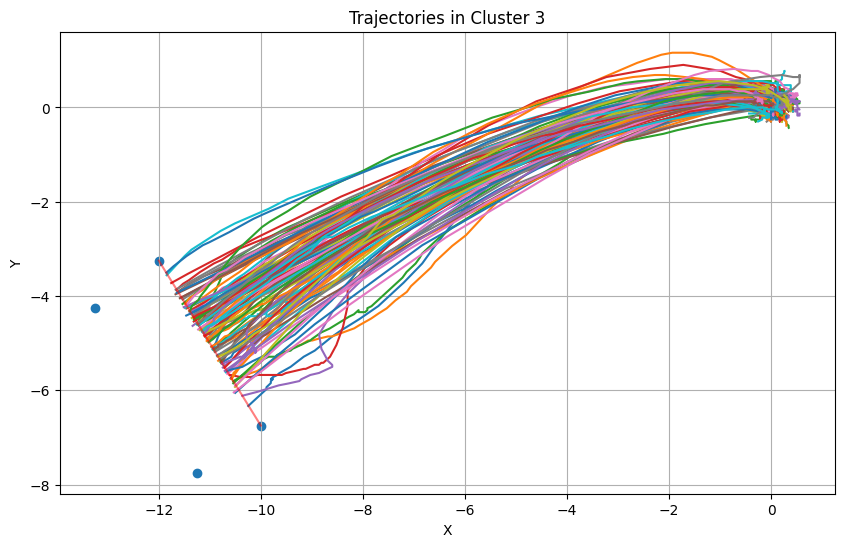

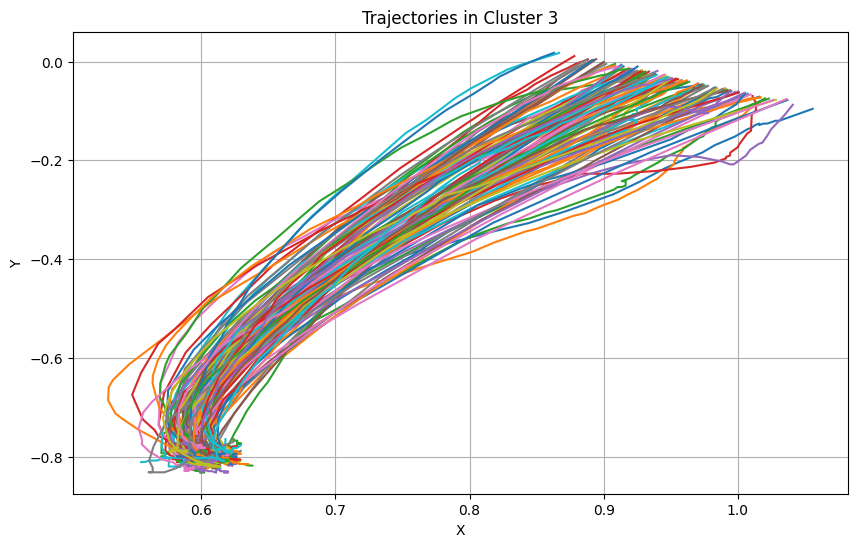

In [13]:
n_clusters = 4
cluster_points = [
    (-10.5, 1.25),  # pt0
    (10.5, 0),      # pt1
    (10.5, 4.85),   # pt2
    (-11, -5)       # pt3
]
rect_df = pd.DataFrame(columns=['cluster', 'rectx', 'recty', 'idxrule'])
truncated_dfx = [[] for _ in range(n_clusters)]
truncated_dfy = [[] for _ in range(n_clusters)]
rotated_dfx = [[] for _ in range(n_clusters)]
rotated_dfy = [[] for _ in range(n_clusters)]
     
# Iterate over each cluster
for cluster in range(4):
    print('Cluster: ', cluster)
    
    # Get the corresponding point for the current cluster
    pt = cluster_points[cluster]
    
    # Plotting the data and computing the target square
    rectx, recty = plot_data(dfx, dfy, cluster_labels, 
              cluster, 4, 
              plotting_target=True, saving_plot=False, pt=pt)
    
    # Cleaning the data: 
    truncated_dfx[cluster] , truncated_dfy[cluster], idxrule = cleaning_data(cluster_datasets[cluster][0], 
                                                            cluster_datasets[cluster][1], 
                                                            rectx, recty)
    
    # Plotting truncated data
    _ = plot_data(truncated_dfx[cluster] , truncated_dfy[cluster], cluster_labels = [], 
                      cluster = cluster, n_clusters = n_clusters, 
                      plotting_target= False, saving_plot= False, pt = pt)
    
    # Linear transformation
    rotated_dfx[cluster] , rotated_dfy[cluster] = linear_transf(truncated_dfx[cluster] , truncated_dfy[cluster], 
                                                    rectx, recty)
    
    # Plotting rotated data
    _ = plot_data(rotated_dfx[cluster] , rotated_dfy[cluster], cluster_labels = [], 
                      cluster = cluster, n_clusters = n_clusters, 
                      plotting_target= False, saving_plot= False, pt = pt)
    
    
    # Concatenate the data to rect_df
    rect_df = pd.concat([rect_df, pd.DataFrame({'cluster': [cluster], 'rectx': [rectx], 'recty': [recty], 'idxrule': [idxrule]})], ignore_index=True)   

# Proves a borrar

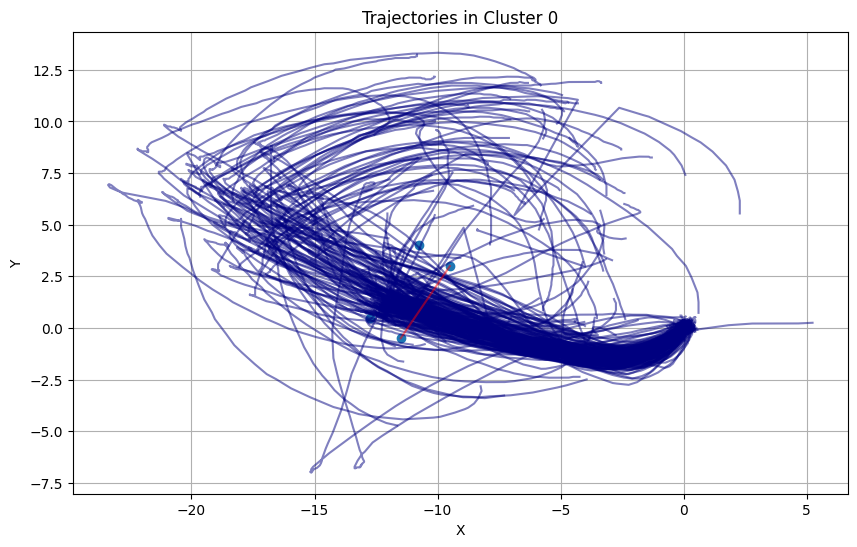

Dataset shape before cleaning:
(170, 2500)
Dataset shape after cleaning:
(166, 2500)


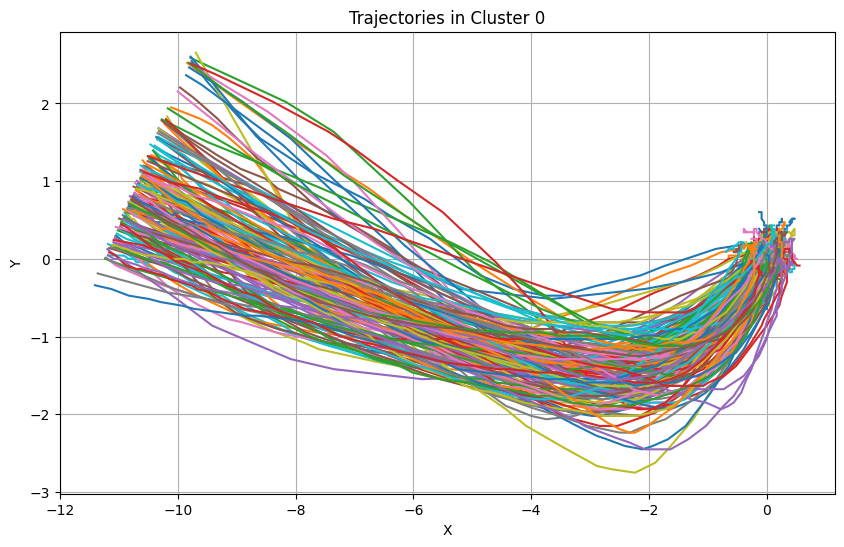

In [3]:
n_clusters = 4
cluster = 0

truncated_dfx = [[] for _ in range(n_clusters)]
truncated_dfy = [[] for _ in range(n_clusters)]

# Plotting the data and computing the target square
pt = (-10.5, 1.25)
rectx, recty = plot_data(dfx, dfy, cluster_labels, 
            cluster, 4, 
            plotting_target=True, saving_plot=False, pt=pt)
truncated_dfx[cluster] , truncated_dfy[cluster], idxrule = cleaning_data(cluster_datasets[cluster][0], 
                                                               cluster_datasets[cluster][1], 
                                                               rectx, recty)
_ = plot_data(truncated_dfx[cluster] , truncated_dfy[cluster], cluster_labels = [], 
                      cluster = cluster, n_clusters = n_clusters)

[ -9.5  -10.75 -11.5  -12.75] [ 3.   4.  -0.5  0.5]


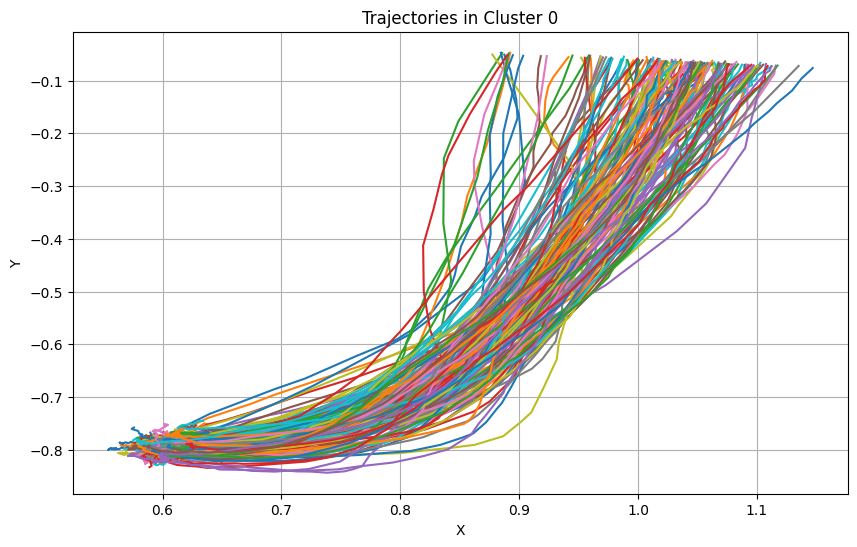

[11.5  12.75  9.5  10.75] [ 1.75  0.75 -1.75 -2.75]


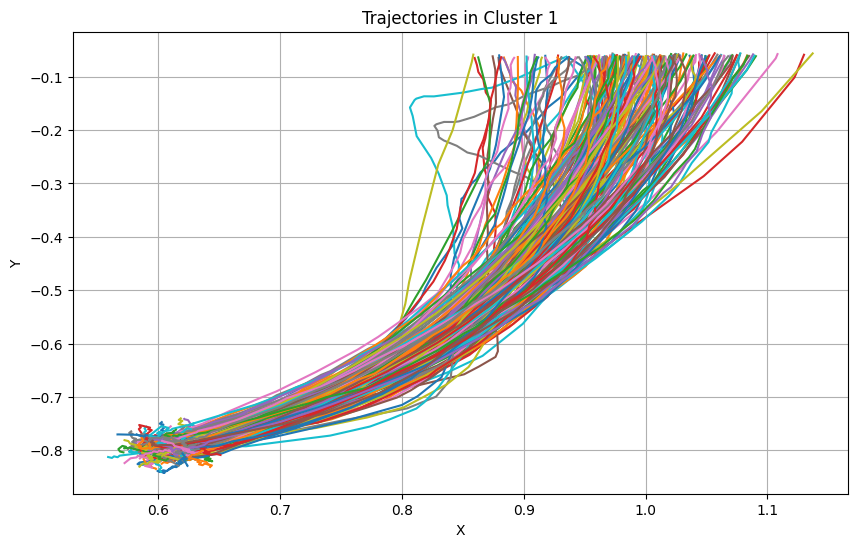

[ 9.5  10.75 11.5  12.75] [6.6 7.6 3.1 4.1]


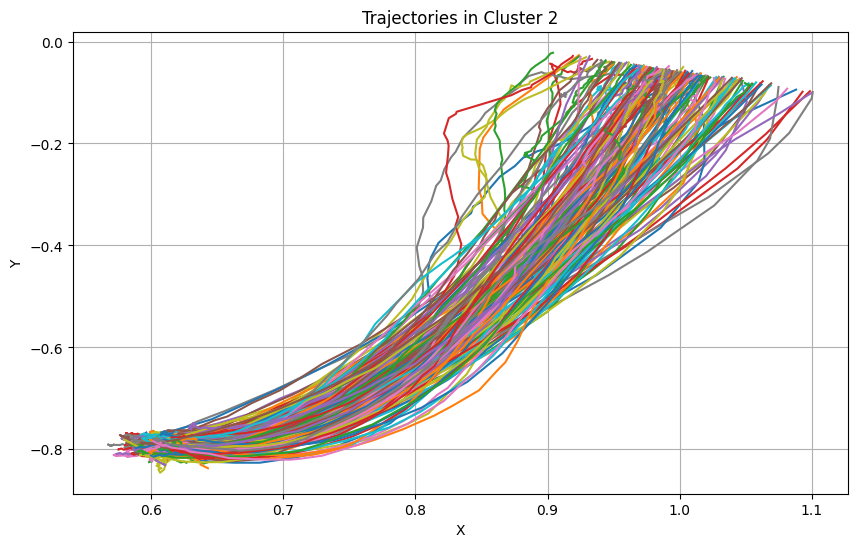

[-12.   -13.25 -10.   -11.25] [-3.25 -4.25 -6.75 -7.75]


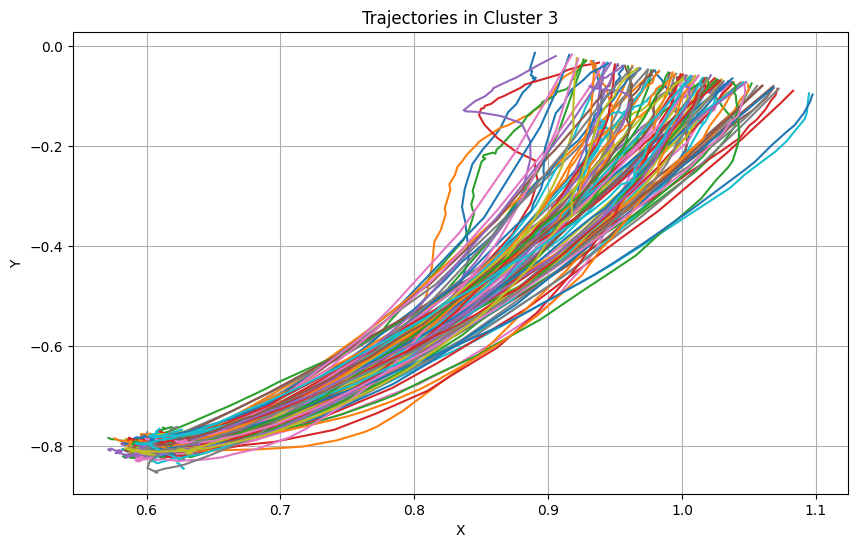

In [17]:
rotated_dfx = [[] for _ in range(n_clusters)]
rotated_dfy = [[] for _ in range(n_clusters)]
# Linear transformation
for cluster in range(4):
    rectx, recty = np.array(rect_df[rect_df['cluster'] == cluster]['rectx'])[0], np.array(rect_df[rect_df['cluster'] == cluster]['recty'])[0]
    print(rectx, recty)
    rotated_dfx[cluster] , rotated_dfy[cluster] = linear_transf(truncated_dfx[cluster] , truncated_dfy[cluster], 
                                                    rectx, recty)
    # Plotting rotated data
    _ = plot_data(rotated_dfx[cluster] , rotated_dfy[cluster], cluster_labels = [], 
                      cluster = cluster, n_clusters = n_clusters, 
                      plotting_target= False, saving_plot= True, pt = pt,
                      pic_name= 'translated'
                      )

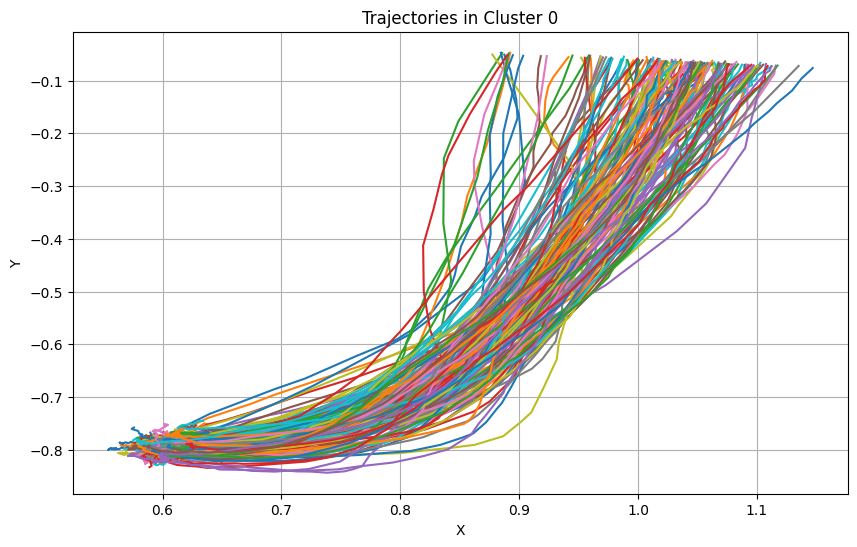

In [12]:
# Plotting rotated data
_ = plot_data(rotated_dfx[cluster] , rotated_dfy[cluster], cluster_labels = [], 
                      cluster = cluster, n_clusters = n_clusters, 
                      plotting_target= False, saving_plot= False, pt = pt)

# Parameter fitting

In [44]:
import os
def load_processed_data(folder_path, file_name, list_df = False):
    if list_df: 
        df_list = []
        i = 0
        while True:
            file_name = f"{file_name}{i}.csv"
            file_path = os.path.join(folder_path, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)  # Change the format as per your requirement
                df_list.append(df)
                i += 1
            else:
                break
        return df_list
    else:
        # Load the DataFrame from the file
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Change the format as per your requirement
        return df

In [41]:
dfx = load_processed_data(folder_path='processed_data', file_name='cluster0_dfx.csv')
dfy = load_processed_data(folder_path='processed_data', file_name='cluster0_dfy.csv')
results = load_processed_data(folder_path='processed_data', file_name='results.csv')

In [45]:
def load_processed_data(folder_path: str, file_name: str) -> pd.DataFrame:
    # Load the DataFrame from the file
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)  # Change the format as per your requirement
    return df
dfx = [[] for _ in range(n_clusters)]
dfy = [[] for _ in range(n_clusters)]
for cluster in range(4): 
    dfx[cluster] = load_processed_data(folder_path='processed_data', file_name='cluster{}_dfx.csv'.format(cluster))
    dfy[cluster] = load_processed_data(folder_path='processed_data', file_name='cluster{}_dfy.csv'.format(cluster))

In [47]:
print(type(dfx), type(dfx[0]))
dfx[0]

<class 'list'> <class 'pandas.core.frame.DataFrame'>


0         1         2         3         4         5         6   
0    0.596353  0.596434  0.596514  0.596363  0.596211  0.596060  0.595908  \
1    0.635124  0.635124  0.635124  0.635124  0.635124  0.635124  0.635124   
2    0.616531  0.616683  0.616571  0.616459  0.616348  0.616236  0.616124   
3    0.612239  0.612239  0.612239  0.612239  0.612239  0.612239  0.612239   
4    0.581959  0.581959  0.581959  0.581959  0.581959  0.581959  0.581959   
..        ...       ...       ...       ...       ...       ...       ...   
163  0.630265  0.630153  0.630041  0.629930  0.629818  0.629706  0.629594   
164  0.633775  0.633664  0.633664  0.633664  0.633664  0.633664  0.633664   
165  0.607388  0.607388  0.607388  0.607388  0.607388  0.607388  0.607388   
166  0.607388  0.607388  0.607388  0.607269  0.607150  0.607031  0.606913   
167  0.603859  0.604114  0.604114  0.604114  0.604114  0.604114  0.604114   

            7         8         9  ...      2490      2491      2492   
0    0.595756  0.595605  0.595453  ...  0.994306  0.994306  0.994306  \
1    0.635124  0.635124  0.635124  ...  0.923777  0.923777  0.923777   
2    0.616012  0.615900  0.615789  ...  0.923603  0.923603  0.923603   
3    0.612239  0.612239  0.612239  ...  0.933601  0.933601  0.933601   
4    0.581959  0.581959  0.581959  ...  0.992340  0.992340  0.992340   
..        ...       ...       ...  ...       ...       ...       ...   
163  0.629483  0.629371  0.629259  ...  0.978373  0.978373  0.978373   
164  0.633664  0.633664  0.633664  ...  0.969272  0.969272  0.969272   
165  0.607388  0.607388  0.607388  ...  0.977289  0.977289  0.977289   
166  0.606794  0.606675  0.606556  ...  1.025762  1.025762  1.025762   
167  0.604114  0.604114  0.604114  ...  0.991648  0.991648  0.991648   

         2493      2494      2495      2496      2497      2498      2499  
0    0.994306  0.994306  0.994306  0.994306  0.994306  0.994306  0.994306  
1    0.923777  0.923777  0.923777  0.923777  0.923777  0.923777  0.923777  
2    0.923603  0.923603  0.923603  0.923603  0.923603  0.923603  0.923603  
3    0.933601  0.933601  0.933601  0.933601  0.933601  0.933601  0.933601  
4    0.992340  0.992340  0.992340  0.992340  0.992340  0.992340  0.992340  
..        ...       ...       ...       ...       ...       ...       ...  
163  0.978373  0.978373  0.978373  0.978373  0.978373  0.978373  0.978373  
164  0.969272  0.969272  0.969272  0.969272  0.969272  0.969272  0.969272  
165  0.977289  0.977289  0.977289  0.977289  0.977289  0.977289  0.977289  
166  1.025762  1.025762  1.025762  1.025762  1.025762  1.025762  1.025762  
167  0.991648  0.991648  0.991648  0.991648  0.991648  0.991648  0.991648  

[168 rows x 2500 columns]

# FUNCTIONS

## Data and velocity

In [15]:
import math

def linear_transf(dfx : pd.DataFrame, dfy : pd.DataFrame, 
                  rectx : np.ndarray, recty : np.ndarray):
    model_target = np.array((1,0))
    if rectx[0] > 0 and recty[-1] > 0:
        screen_target = np.array(((rectx[3]+rectx[0])/2,(recty[3]+recty[0])/2))
    elif rectx[0] < 0 and recty[-1] > 0: 
        dfx = -1 * dfx
        screen_target = np.array(((-rectx[3]-rectx[0])/2,(recty[3]+recty[0])/2))
    elif rectx[0] > 0 and recty[-1] < 0:
        dfy = -1 * dfy
        screen_target = np.array(((rectx[3]+rectx[0])/2,(-recty[3]-recty[0])/2)) 
    else: 
        dfx = -1 * dfx
        dfy = -1 * dfy
        screen_target = np.array(((-rectx[3]-rectx[0])/2,(-recty[3]-recty[0])/2))
        
    model_origin = np.array((np.cos(-math.pi*7/24),np.sin(-math.pi*7/24))) 
    screen_origin = np.array((0,0))

    v_model=model_target-model_origin
    v_model_ort=np.array((v_model[1],-v_model[0]))

    v_screen=screen_target-screen_origin
    v_screen_ort=np.array((v_screen[1],-v_screen[0]))

    model_M=np.vstack((np.append(model_origin,1),np.append(model_target,1),np.append(v_model_ort,0))).T
    screen_M=np.vstack((np.append(screen_origin,1),np.append(screen_target,1),np.append(v_screen_ort,0))).T

    M=np.dot(model_M,np.linalg.inv(screen_M))
    A=M[:2,:2]
    b=M[:2,-1:].flatten()
    
    dfx_=A[0,0]*dfx+A[0,1]*dfy+b[0]
    dfy_=A[1,0]*dfx+A[1,1]*dfy+b[1]
    
    return dfx_, dfy_

In [34]:
def experimental_velocity(dfx, dfy):
    # Computing velocity of each point along the trajectories
    dfx1=dfx.iloc[:,1:]
    dfx1.columns = range(dfx1.shape[1])
    dfvx=dfx1-dfx.iloc[:,:-1]

    dfy1=dfy.iloc[:,1:]
    dfy1.columns = range(dfy1.shape[1])
    dfvy=dfy1-dfy.iloc[:,:-1]

    dfv=np.sqrt(np.square(dfvx)+np.square(dfvy))
    
    return dfv

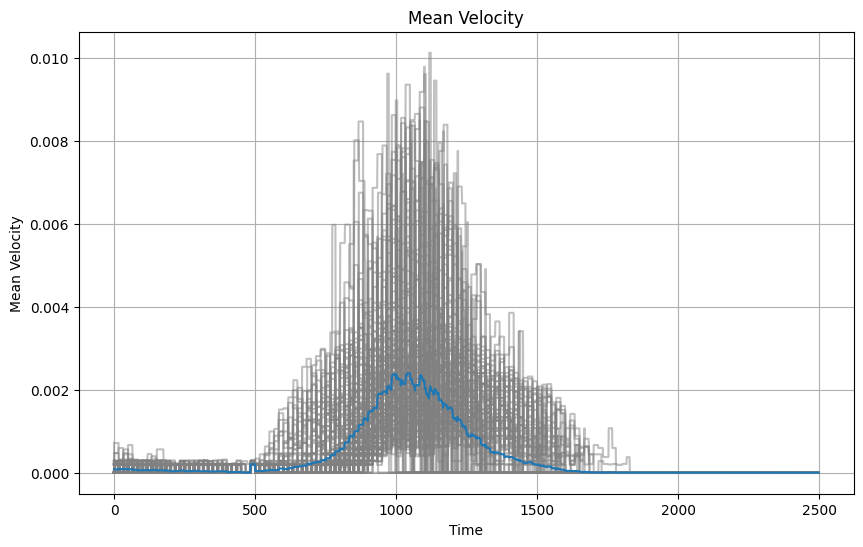

In [35]:
import matplotlib.pyplot as plt
dfv = experimental_velocity(rotated_dfx[cluster], rotated_dfy[cluster])
# Plot mean velocity
plt.figure(figsize=(10, 6))
for i in range(len(dfv)):
    plt.plot(dfv.iloc[i], color='gray', alpha=0.5)
plt.plot(dfv.mean(axis = 0), label='Mean Velocity')
plt.title('Mean Velocity')
plt.xlabel('Time')
plt.ylabel('Mean Velocity')
#plt.legend()
plt.grid(True)
plt.show()

In [39]:
print(type(rotated_dfx))
print(type(rect_df))
print(type(dfv))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Numerical simulation

In [18]:
def numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0.5, gamma = 0.5, epsilon = 0.5, alpha = 0.5,
                        u_0 = (0,0), l_0 = (0,0,0,0), 
                        i_max = 1000, dt = 1./500,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1): 
    
    ## Set the initial conditions: 
    p1, p2, v1, v2 = x_0
    u1, u2 = u_0
    l1, l2, l3, l4 = l_0
    
    ## Initialize the loop
    i = 0
    t = 0.
    Wt = 0
    l = p_T - p1
    
    ## Initialize the trajectory vector
    p1_ = []
    p2_ = []
    v1_ = []
    v2_ = []
    
    ## Initialize the utility vector 
    u1_ = []
    u2_ = []
     
    ## Model time evolution definition following the system's dynamics
    while (i < i_max and p1 < p_T):
        
        t = i * dt
        if ( Autoregr == True ):
            W_increment=np.random.normal(0.,np.sqrt(dt),1)[0]
            Wt = Wt + W_increment
        else: 
            Wt = np.random.normal(0.,np.sqrt(dt),1)[0] 
           
        ## System's dynamics:
        u1 = - (l * l3) / ( 2 * Wt * l * l2 * sigma * np.exp(t/gamma) - alpha * epsilon + epsilon ) * np.exp(t/gamma)
        u2 = - (l * l4) / (alpha * epsilon) * np.exp(t/gamma)
         
        p1 = p1 + dt * v1
        p2 = p2 + dt * (v2 + Wt * sigma * u1**2)
        v1 = v1 + dt * u1
        v2 = v2 + dt * u2 
        
        l1 = l1
        if (np.linalg.norm(p1 - p_T) < dt * v1):
            l2 = l2 - dt * (2 * p2 * np.exp(- t / gamma)) 
        l3 = l3 - dt * l1
        l4 = l4 - dt * l2 
        
        if(Arc):
            p1_.append((1+p2)*np.cos(angle*(p1/p_T-1)+angle0))
            p2_.append((1+p2)*np.sin(angle*(p1/p_T-1)+angle0))
        else:
            p1_.append(p1)
            p2_.append(p2)
        v1_.append(v1)
        v2_.append(v2)
        u1_.append(u1)
        u2_.append(u2)
        
        i = i + 1
        
    return np.array(p1_), np.array(p2_), np.array(v1_), np.array(v2_), np.array(u1_), np.array(u2_), t

In [19]:
def arc_length(x, y):
    '''
        Function that calculates the arc length of a curve defined by points (x, y).
    '''
    npts = len(x)
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    for k in range(1, npts):
        arc = arc + np.sqrt((x[k] - x[k-1])**2 + (y[k] - y[k-1])**2)

    return arc

In [22]:
def ComputeFunctional(parameters, sigma = 0, gamma = 0.5, epsilon = 0.1, alpha = 0.5, timestep=1/500):
    
    x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    
    trange=np.linspace(0, len(ux)*timestep, num=len(ux))
    force=((1-alpha)*ux**2+alpha*uy**2)*math.e**(trange/gamma)/(2*arc_length(x,y))
    integral=(force[1:]+force[:-1]).sum()*T/(2*(len(ux)-1))
    
    ### J per què està definida així???
    #print(x)
    J=(1-y[-1]**2)*math.e**(-T/gamma)-epsilon*integral
    return -J

In [30]:
import matplotlib.pyplot as plt

def plot_trajectory(x, y, showing = True, via = True, plot_title = 'Mean Trajectory'): 
    plt.plot(x,y,color='blue', label=plot_title, alpha = 1)
    if via:
        angle=math.pi*7/24
        T_1=.2
        plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)
    if showing: 
        plt.show()
    
def generate_trajectory(params = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371), 
                        sigma = 0, gamma = 0.5, epsilon = 0.1, alpha = 0.5, timestep=1/500, 
                        plotting = True): 
    initial_cond = scipy.optimize.minimize(ComputeFunctional, params, args=(), method=None)
    parameters = initial_cond.x
    x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
    if plotting: 
        plot_trajectory(x,y, showing = True)
    return x, y

def plot_simulation(x,y, dfx, dfy): 
    for i in range(len(dfx)):
        plt.plot(dfx.iloc[i], dfy.iloc[i], color='gray', alpha=0.5)
    plot_trajectory(x,y, showing = False)
    plt.title('Trajectories in Cluster 2')
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
def ComputeVel(parameters, vel, T, sigma = 0, gamma = 0.5, epsilon = 0.1, alpha = 0.5, timestep=1/500):
    gamma, epsilon, alpha = parameters
    parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
    x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    
    vel_max = np.max(np.sqrt(np.square(v) + np.square(w)))
    
    return (T2 - T)**2 + (vel_max - vel)**2

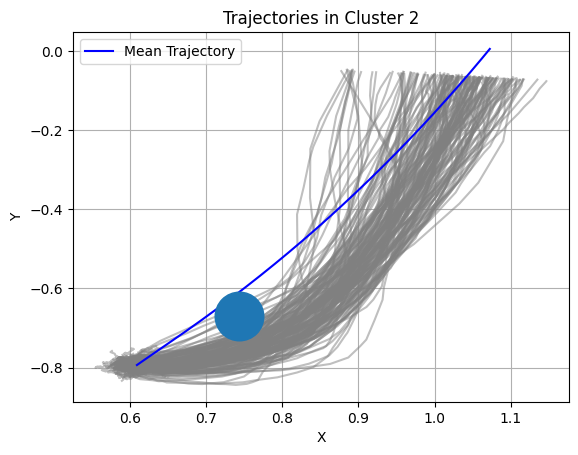

In [31]:
x, y = generate_trajectory(plotting = False)
cluster = 0
plot_simulation(x, y, rotated_dfx[cluster], rotated_dfy[cluster])

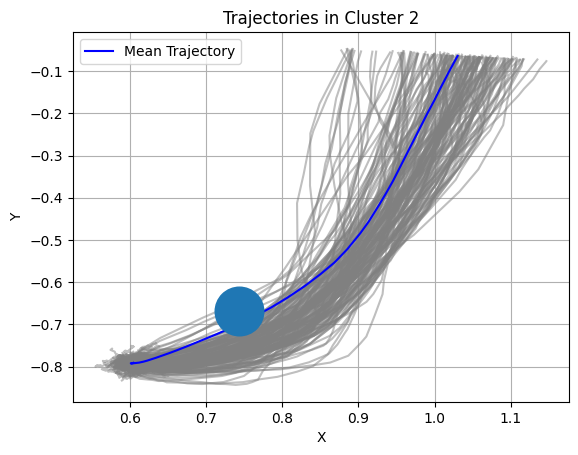

In [32]:
plot_simulation(rotated_dfx[cluster].mean(axis = 0), rotated_dfy[cluster].mean(axis = 0), rotated_dfx[cluster], rotated_dfy[cluster])

numpy.ndarray